In [ ]:
! cd nb-based-workflow && pip install .

In [35]:
from IPython.display import Image, HTML, Markdown, display
from ploomber_nb.pipeline import make

In [36]:
Markdown(filename='nb-based-workflow/README.md')

# Notebook-based workflow

ipython -i -m ploomber.entry pipeline.make status

In [30]:
ls

LICENSE                  environment.yml          nb-based-workflow/
README.md                imdb/                    nb-based-workflow.ipynb
basic-ml/                lyrics/                  output/


In [2]:
# returns our pipeline object
dag = make()

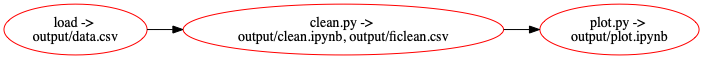

In [4]:
Image(filename=dag.plot())

In [18]:
# helper function to display code
def display_code(code):
    display(Markdown("""
```python
{}
```
""".format(code)))

## Load task (Python function)

In [19]:
display_code(str(dag['load'].source))


```python
def load(product):
    df = pd.DataFrame({'x': np.random.rand(500)})
    df['x'] = df['x'] + 1
    df.to_csv(str(product), index=False)

```


## Clean task (Python script)

In [20]:
display_code(str(dag['clean.py'].source))


```python
# + tags=[]
import pandas as pd

# + tags=["parameters"]
product = None
upstream = None

# + tags=[]
df = pd.read_csv(upstream['load'])
df
# + tags=[]
df['x'] = df['x'] + 1
df.to_csv(product['data'], index=False)

# + tags=[]

```


## Plot task (Pyton script)

In [21]:
display_code(str(dag['plot.py'].source))


```python
# + tags=[]
import pandas as pd
import seaborn as sns

# + tags=["parameters"]
product = None
upstream = None

# + tags=[]
df = pd.read_csv(upstream['clean.py']['data'])

df['x'] = df['x'] + 1
# -

sns.distplot(df.x)



```


## Executing the pipeline

In [25]:
! python -m ploomber.entry ploomber_nb.pipeline.make build

100%|██████████████████████████████████████████| 3/3 [00:00<00:00, 20971.52it/s]
name      Ran?      Elapsed (s)    Percentage
--------  ------  -------------  ------------
load      False               0             0
clean.py  False               0             0
plot.py   False               0             0


Let's execute it again, since no source changes have been made, it will skip all tasks.

In [26]:
! python -m ploomber.entry ploomber_nb.pipeline.make build

100%|███████████████████████████████████████████| 3/3 [00:00<00:00, 5329.48it/s]
name      Ran?      Elapsed (s)    Percentage
--------  ------  -------------  ------------
load      False               0             0
clean.py  False               0             0
plot.py   False               0             0
